# STAT207 Final Project - The Value of Professional Soccer Players

By: Gabriela Sandschafer, Bo Bourlard, & Kyle Cruz

## 1. Introduction

In 2022, the global soccer market was valued at US$ 3.2 Billion (Football Market). This industry continues to grow exponentially every year. Matter of fact, the continued participation and viewing of professional sports subconsciously raises awarness about the benfits of physical activites and self care in daily life. Since these soccer leagues and teams have such passionate fans, they want to have the best team (made up of individual players) possible in order to satisfty fans and club investors.

To that end, we will be answering the following 4 questions using several types of analyses:

- *Answered through descriptive analysis:* What is the relationship between a soccer players position and their value (EUR) in this dataset? Furthermore, how does this relationship between a soccer players position and their value (EUR) change for different values of minutes played?


- *Answered through inference:* Is there a difference between the player value of French & Spanish Players and all other players? 


- *Answered through linear regression:* Is there a linear relationship between the number of shots, height, passes blocked, and passes completed with the value of a player?


- *Answered through logistic regression:* Is there a linear relationship between the log odds of the success level of players being worth more than 20 million euros in value, and goals, assists, touches, minutes, and passes completed? What about for the population of all professional soccer players? What explanatory variables should we include in the model to build a parsimonious model?


To answer these questions will allow the soccer industry (teams/scouts/fans) to identify what impacts the value of a player and what is most important when analysing players. It can also help tell whether a target player is currently over or undervalued and what price they should be willing to pay for a player of that quality. 
    
“Football Market Size, Share, Trends: Industry Forecast 2023-2028.” Size, Share, Trends | Industry Forecast 2023-2028, https://www.imarcgroup.com/football-market. 

**There are some limitations that exist within our dataset.** 

These include:
1. Not a huge sample of players to take from - if there was more data available the analysis would be more concrete and informative.
2. There are some big variations in pay that might skewed data - so we must pay attention. If the value of these players were more normally distributed it would make our analysis more accurate and educational.
3. The french league in the dataset has only low value players so it may create some discrepencies.

In the report, we will proceed with caution and the knowledge that these limitations exist. 

Lastly, there is no information on the amount of years each professional soccer player has been in the league. We would therefore want to include that in our dataset if possible. This would most likely add to our analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
from scipy.stats import t
from scipy.stats import norm, f
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [2]:
df = pd.read_csv("soccer_player.csv")
df


,Unnamed: 0,League,player,Substitution,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,value,...,goals,goals_per_shot,passes_completed,assisted_shots,passes_blocked,touches,height,assists,games_starts,minutes
0,0,MLS,Robert Beric,1,0.46,62,28,2.86,1.29,2400000,...,1,0.14,46,3,5,115,188,0,4,413
1,1,La Liga,Karim Benzema,0,0.63,27,12,3.46,1.54,32000000,...,21,0.14,1119,61,36,1688,184,8,36,3141
2,2,La Liga,Carlos Soler,1,0.53,8,5,1.27,0.79,40000000,...,2,0.11,582,12,26,932,180,0,24,2066
3,3,La Liga,Cristian Tello,4,0.29,22,8,3.32,1.21,4000000,...,2,0.11,285,7,16,453,178,0,5,787
4,4,La Liga,Mikel Oyarzabal,2,0.88,31,16,4.00,2.07,48000000,...,10,0.11,828,53,88,1571,181,11,36,3051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Premier League,Jamie Vardy,1,1.06,21,15,2.56,1.83,16000000,...,23,0.22,314,28,28,734,179,5,34,3033
76,76,Premier League,Harry Kane,0,0.66,39,15,3.88,1.49,120000000,...,18,0.21,394,24,33,923,188,2,29,2587
77,77,Premier League,Neal Maupay,0,0.79,25,11,3.02,1.33,17000000,...,10,0.10,540,26,33,1063,173,3,30,2766
78,78,Premier League,Sadio Mane,1,0.59,27,13,3.27,1.57,120000000,...,18,0.24,933,56,50,1590,174,7,31,2747


In [3]:
del df['Unnamed: 0']

There are 80 rows and 22 columns in this dataset after removing one unnecessary column.

This is a random sample of 80 professional soccer players.

## 2. Descriptive Analytics

**In this descriptive analytics section, we will be exploring three variables and their relationships to each other. The three variables from the dataset that will be explored are:**

- **Value:** a soccer players value in EUR
- **Position:** a soccer players position on the field
- **Minutes:** the number of minutes played as a soccer player


**Research Question: What is the relationship between a soccer players position and their value (EUR) in this dataset?**

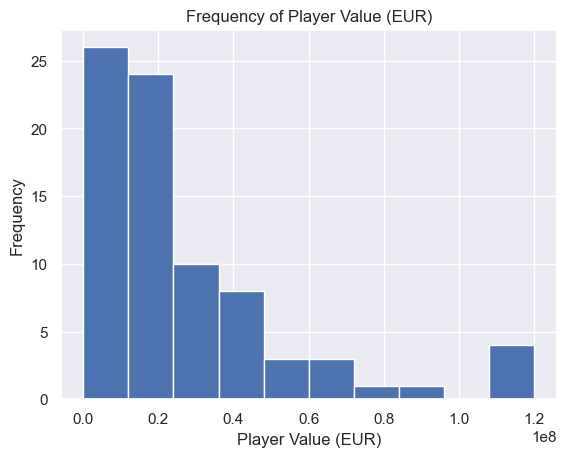

In [4]:
df['value'].hist()
plt.xlabel('Player Value (EUR)')
plt.ylabel('Frequency')
plt.title('Frequency of Player Value (EUR)')
plt.show()

This is a histogram showing the frequency of different value quantities for players in the dataset. The histogram is skewed to the right and bimodal (around 0.001 to 1.2). The majority of the observations lay in between 0.001 and 0.4 (in other words between 100,000 and 40,000,000 EUR). However this is another slight peak between 1.1 and 1.2 (between 110,000,000 and 120,000,000 EUR) which can be seen as the few very highly valued players like Messi. This histogram gives us a reference on what the common values are of these randomized professional soccer players.

*Next, we will be looking a visualization (boxplot) describing the relationship between a players position on the field and their value as a soccer player.*

First, we removed the positions *"DF"*, *"FD,DF"* and *"MF,DF"* as there was only three observations in the data set so it would not very informative for this visualization.

** *You can see that only three players were dropped from the original dataset by the different in the rows.*

In [5]:
df["position"].value_counts()

FW       45
FW,MF    17
MF,FW     8
MF        7
DF        1
FW,DF     1
MF,DF     1
Name: position, dtype: int64

In [6]:
df_position = df[(df["position"] == "FW") | (df["position"] == "MF") | (df["position"] == "FW,MF") | (df["position"] == "MF,FW")]
df_position.head()

,League,player,Substitution,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,value,nationality,...,goals,goals_per_shot,passes_completed,assisted_shots,passes_blocked,touches,height,assists,games_starts,minutes
0,MLS,Robert Beric,1,0.46,62,28,2.86,1.29,2400000,si SVN,...,1,0.14,46,3,5,115,188,0,4,413
1,La Liga,Karim Benzema,0,0.63,27,12,3.46,1.54,32000000,fr FRA,...,21,0.14,1119,61,36,1688,184,8,36,3141
2,La Liga,Carlos Soler,1,0.53,8,5,1.27,0.79,40000000,es ESP,...,2,0.11,582,12,26,932,180,0,24,2066
3,La Liga,Cristian Tello,4,0.29,22,8,3.32,1.21,4000000,es ESP,...,2,0.11,285,7,16,453,178,0,5,787
4,La Liga,Mikel Oyarzabal,2,0.88,31,16,4.00,2.07,48000000,es ESP,...,10,0.11,828,53,88,1571,181,11,36,3051


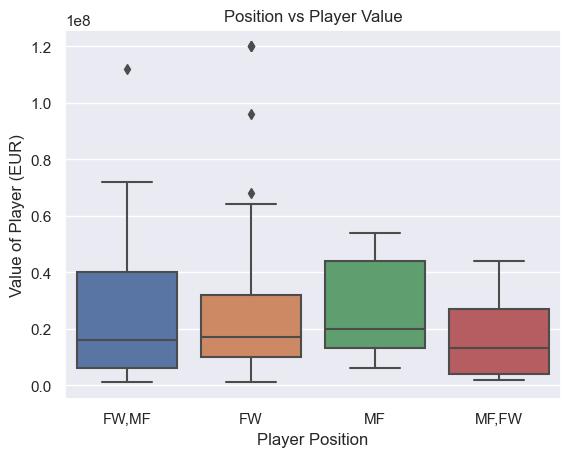

In [7]:
sns.boxplot(x = 'position', y = 'value', data = df_position)
plt.title('Position vs Player Value')
plt.ylabel("Value of Player (EUR)")
plt.xlabel("Player Position")
plt.show()

This is a boxplot shows us the player position versus the player value in Euros. We can see that the medium value change slightly for each position. The position with the highest medium is MF (MidField) and the lowest is MF,FW (MidField, Forward). There are some outliers above in FW and FW,MF, showing that there are some players in those positions with relatively higher values than the other players within the same position.

Additionally, the FW,MF position looks to have the largest interquartile range and max value. The FW position then has the second largest max but smallest IQR. It seems that those whose play MF (Midfield) correlate with having with higher value. Therefore, if you were a male soccer player and you could choose which position to play, you would most likely take up the position of a midfielder as their value tends to be highest. However, if you are the best of the best, a FW position will have a higher value.

The boxplot tells us that there is some relationship between player position and their value as a soccer player. In this dataset, a MF (Midfielder) is most likely to have the highest value as the min, medium, Q1 and Q3 are higher than all other positions.

**Furthermore, how does this relationship between a soccer players position and their value (EUR) change for different values of minutes played?**

*Now, we will be looking at a scatterplot describing the relationship between a players value as a soccer player, the number of minutes they play, and their position on the field.*

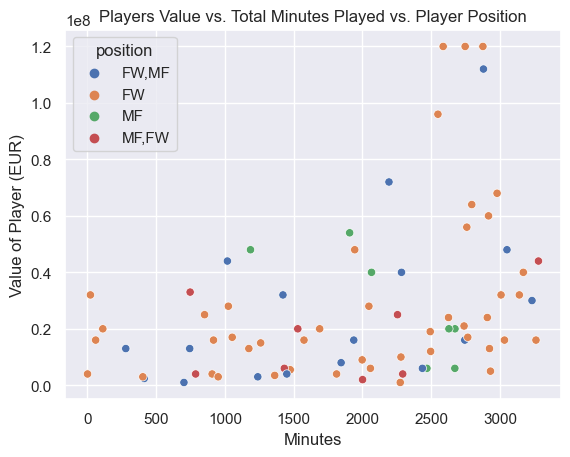

In [8]:
sns.scatterplot(x = 'minutes', y = 'value', hue = 'position', data = df_position)
plt.title('Players Value vs. Total Minutes Played vs. Player Position')
plt.ylabel("Value of Player (EUR)")
plt.xlabel("Minutes")
plt.show()

The scatterplot above shows us the spread of data points (Minutes vs Value) in our dataset. We can see that there is a slight positive exponential relationship between the variables, meaning that the more minutes you play the higher your value tends to be as a player. Looking at the position index, there is no clear relationship between the position, the minutes played and your value. Though there are some trends in the data. For example, the FW positions seems to follow the relationship better than the other positions. It suggests that the FW position is most relaible; as you work and play more, your value as a player increases. 

*Next are summary statistics for further analsyse of the research questions.*

**Summary Statistics for all 4 player positions:**

Includes:
- summary stats for each positions values 
- summary stats for each positions minutes played

In [9]:
df_FWMF = df_position[df_position["position"] == "FW,MF"]
df_FW = df_position[df_position["position"] == "FW"]
df_MF = df_position[df_position["position"] == "MF"]
df_MFFW = df_position[df_position["position"] == "MF,FW"]

*Summary Statistics: Value for positions*

In [10]:
print('Mean (FW,MF):', df_FWMF['value'].mean())
print('Mean (FW):', df_FW['value'].mean())
print('Mean (MF):', df_MF['value'].mean())
print('Mean (MF,FW):', df_MFFW['value'].mean())

Mean (FW,MF): 27082352.94117647
Mean (FW): 29377777.777777776
Mean (MF): 27714285.714285713
Mean (MF,FW): 17250000.0


Notice that FW has the highest mean value. Next, MF, then FW,MF and lastly MF,FW.

In [11]:
print('Median (FW,MF):', df_FWMF['value'].median())
print('Median (FW):', df_FW['value'].median())
print('Median (MF):', df_MF['value'].median())
print('Median (MF,FW):', df_MFFW['value'].median())

Median (FW,MF): 16000000.0
Median (FW): 17000000.0
Median (MF): 20000000.0
Median (MF,FW): 13000000.0


Notice that MF has the highest median value. Next, FW, then FW,MF and lastly MF,FW.

In [12]:
print('Interquartile Range(IQR) (FW,MF):', df_FWMF['value'].quantile(q = 0.75) - df_FWMF['value'].quantile(q = 0.25))
print('Interquartile Range(IQR) (FW):', df_FW['value'].quantile(q = 0.75) - df_FWMF['value'].quantile(q = 0.25))
print('Interquartile Range(IQR) (MF):', df_MF['value'].quantile(q = 0.75) - df_FWMF['value'].quantile(q = 0.25))
print('Interquartile Range(IQR) (MF,FW):', df_MFFW['value'].quantile(q = 0.75) - df_FWMF['value'].quantile(q = 0.25))

Interquartile Range(IQR) (FW,MF): 34000000.0
Interquartile Range(IQR) (FW): 26000000.0
Interquartile Range(IQR) (MF): 38000000.0
Interquartile Range(IQR) (MF,FW): 21000000.0


**.   .   .**

Overall, we can see that the mean and standard deviation are highest in the FW postion, whereas for the median and IQR, the MF position has the highest. 

Since the data is not normally distributes, the mean is not a good summary and we should use the median instead. Therefore, it can be said that the Midfield position (MF) correlated best with a higher player value (EUR).

Additionally, the FW has the largest standard deviation meaning that the data is less cluster to the mean than the other positions. A data set with more clustering has a more reliable mean, thus FW does not.

In conclusion, it can be said for the first research question that there is a relationship between position and player value. Each position has some correlation. It can be said that the MF position agrees best with a higher player value. Then the FW position.

**.   .   .**

*Summary Statistics: Value for minutes*

In [13]:
print('Mean (FW,MF):', df_FWMF['minutes'].mean())
print('Mean (FW):', df_FW['minutes'].mean())
print('Mean (MF):', df_MF['minutes'].mean())
print('Mean (MF,FW):', df_MFFW['minutes'].mean())

Mean (FW,MF): 1757.0588235294117
Mean (FW): 1976.8444444444444
Mean (MF): 2228.8571428571427
Mean (MF,FW): 1790.625


Notice that MF has the highest mean minutes. Next, FW, then MF,FW and lastly FW,MF.

In [14]:
print('Median (FW,MF):', df_FWMF['minutes'].median())
print('Median (FW):', df_FW['minutes'].median())
print('Median (MF):', df_MF['minutes'].median())
print('Median (MF,FW):', df_MFFW['minutes'].median())

Median (FW,MF): 1845.0
Median (FW): 2275.0
Median (MF): 2469.0
Median (MF,FW): 1765.5


Notice that MF has the highest median minutes. Next, FW, then FW,MF and lastly MF,FW.

In [15]:
print('Standard Deviation (FW,MF):', df_FWMF['minutes'].std())
print('Standard Deviation (FW):', df_FW['minutes'].std())
print('Standard Deviation (MF):', df_MF['minutes'].std())
print('Standard Deviation (MF,FW):', df_MFFW['minutes'].std())

Standard Deviation (FW,MF): 942.3459072036815
Standard Deviation (FW): 984.7513289140461
Standard Deviation (MF): 552.1302468836584
Standard Deviation (MF,FW): 847.1358362151846


Notice that FW has the highest standard deviation. Next, FW,MF, then MF,FW and lastly MF.

In [16]:
print('Interquartile Range(IQR) (FW,MF):', df_FWMF['minutes'].quantile(q = 0.75) - df_FWMF['minutes'].quantile(q = 0.25))
print('Interquartile Range(IQR) (FW):', df_FW['minutes'].quantile(q = 0.75) - df_FWMF['minutes'].quantile(q = 0.25))
print('Interquartile Range(IQR) (MF):', df_MF['minutes'].quantile(q = 0.75) - df_FWMF['minutes'].quantile(q = 0.25))
print('Interquartile Range(IQR) (MF,FW):', df_MFFW['minutes'].quantile(q = 0.75) - df_FWMF['minutes'].quantile(q = 0.25))

Interquartile Range(IQR) (FW,MF): 1418.0
Interquartile Range(IQR) (FW): 1777.0
Interquartile Range(IQR) (MF): 1632.5
Interquartile Range(IQR) (MF,FW): 1246.5


Notice that FW has the highest IQR. Next, MF, then FW,MF and lastly MF,FW.

**. . .**

Lastly, we can see that the mean and median minutes are highest in the MF postion, whereas for the standard deviation and IQR, the FW position holds the highest. 

It can be said that the Midfield position (MF) plays the most minutes out of all the positions. You would think that they would then have the highest valuation as a player but that is not the case. Looking back at the scattergraph, it can be seen that specifically with the MF position it does not correlation strongly. However with the FW position here tends to be a stronger more visible curve to the relationship. The minutes played does not really matter much until a certain point (~2250 minutes).

Therefore, all in all there definitely is a relationship between the minutes played and the player's value. However, the relationship when specifing the players positions is not as clear. They vary accordingly to the player. 

**. . .**


## 3. Inference

Type of inference chosen: difference in two population means

**Research Question:** Is there a difference in player value between French and Spanish Players vs everyone else? 

#### Hypothesis:

H0: µ_french and spanish_value - µ_everyon else_Value = 0

HA: µ_french and spanish_value - µ_everyon else_Value != 0

In [17]:

fr_sp = df[(df["League"] == 'France Ligue 12') | (df["League"] == 'France Ligue 10') | (df["League"] == 'France Ligue 3') | (df["League"] == 'France Ligue 20') |(df["League"] == 'France Ligue 5') | (df["League"] == 'France Ligue 2') | (df["League"] == 'Ligue 1') | (df["League"] == 'France Ligue 18') | (df["League"] == 'La Liga')]
all_else = df[(df["League"] == 'MLS') | (df["League"] == 'Premier League') | (df["League"] == 'Serie A') | (df["League"] == 'Bundesliga')]

print(len(fr_sp))
print(len(all_else))
frsp_mean = round(fr_sp['value'].mean(),2)
frsp_std = round(fr_sp['value'].std(), 2)


print(frsp_mean)
print(frsp_std)


34
46
28266838.24
27909227.52


In [18]:
all_else_mean = round(all_else['value'].mean(), 2)
all_else_std = round(all_else['value'].std(), 2)

print(all_else_mean)
print(all_else_std)


27117391.3
30147056.64


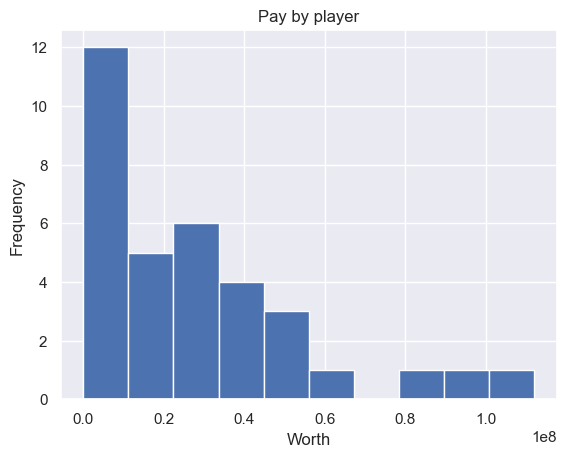

In [19]:
fr_sp['value'].hist()
plt.xlabel('Worth')
plt.ylabel('Frequency')
plt.title('Pay by player')
plt.show()

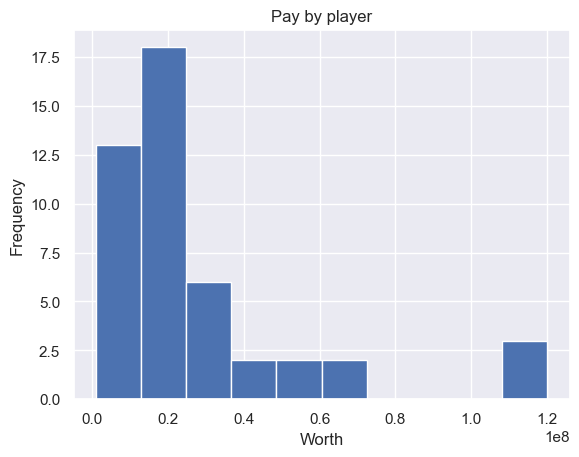

In [20]:
all_else['value'].hist()
plt.xlabel('Worth')
plt.ylabel('Frequency')
plt.title('Pay by player')
plt.show()

Both distributions are not normal!

In [21]:
print(len(fr_sp))
print(len(all_else))

34
46


#### Central Limit Theorem Conditions for Sample Mean Differences

**Condition: The observations are independent.**

- The dataset was randomly sampled.

- n_french and spanish players = 34 < 10% of all soccer players from french and spanish speaking countries.

- n_all other players = 46 < 10% of all other soccer players from non french/spanish speaking countries.

**Condition: Either n > 30 OR the population distribution is normal.**

- The sample size n_french and spanish players = 34 > 30.

- The sample size n_all other players = 46 > 30.


All the conditions are met!


#### Creating a 95% confidence interval

We will use t-distribution to find our critical value.


In [22]:

fr_sp = df[(df["League"] == 'France Ligue 12') | (df["League"] == 'France Ligue 10') | (df["League"] == 'France Ligue 3') | (df["League"] == 'France Ligue 20') |(df["League"] == 'France Ligue 5') | (df["League"] == 'France Ligue 2') | (df["League"] == 'Ligue 1') | (df["League"] == 'France Ligue 18') | (df["League"] == 'La Liga')]
all_else = df[(df["League"] == 'MLS') | (df["League"] == 'Premier League') | (df["League"] == 'Serie A') | (df["League"] == 'Bundesliga')]

print(len(fr_sp))
print(len(all_else))

34
46


In [23]:
# n_frsp = len(fr_sp)
# n_else = all_else.shape[0]
# # for difference in sample proportions:
# samp_dist_prop = []
# samp_dist_z = []
# for i in range(10000):
#     failed_UK = binom.rvs(n_UK, common_phat)
#     failed_Aus = binom.rvs(n_Aus, common_phat)
#     phat1_less_phat2 = failed_UK/n_UK failed_Aus/n_Aus
#     phat_est = (failed_UK + failed_Aus) / (n_UK + n_Aus)
#     sterr = (phat_est * (1 phat_est) * ((1/n_UK) + (1/n_Aus))) ** (1/2)
#     z_stat = phat1_less_phat2 / sterr
#     samp_dist_prop.append(phat1_less_phat2)
#     samp_dist_z.append(z_stat)
# samp_dist = pd.DataFrame({'prop': samp_dist_prop, 'z': samp_dist_z}

In [24]:
critical_value = t.ppf(0.975, df = 33)
critical_value


2.0345152974493383

In [25]:
point_estimate = frsp_mean - all_else_mean
point_estimate

1149446.9399999976

In [26]:
standard_error = np.sqrt((frsp_std**2)/34 + (all_else_std**2)/46)
standard_error

6532002.66232966

In [27]:
lower_bound = point_estimate - critical_value * standard_error
upper_bound = point_estimate + critical_value * standard_error
print('95% Confidence Interval:', lower_bound, ',', upper_bound)

95% Confidence Interval: -12140012.3994895 , 14438906.279489495


 The confidence interval (-12140012.3994895, 14438906.279489495) includes 0, then it suggests that we fail to reject the null hypothesis that there is no significant difference between the two categorical variables. In other words, the range of values suggests that the difference between the two categorical variables may not be statistically significant. In this context it means that there is no difference between french/spanish players and all other players.

In [28]:
test_stat = (point_estimate - 0)/standard_error
p_value = 2 * (1 - t.cdf(np.abs(test_stat), df = 661))
p_value
print('P-Value:', p_value)

P-Value: 0.8603701526272185


 The p-value of 0.8603701526272185 suggests that there is insufficient evidence to reject the null hypothesis based on the observed data, and the difference between the groups may not be statistically significant. This means that there is not difference between the different french/spanish players and all other players.

 Thus, the conclusion answers the research question that there is not difference.

## 4. Linear Regression

**Motivation:** help scouts/teams/fans understand what makes a high value player

Also identifies: 
- what impacts the value of a player 
- whether target player is currently over or undervalued 
- what price they should be willing to pay for a player of that quality


We want to find out if the variables passes completed, shots, passes blocked, height have an effect on the value of a player.


**Research Question**: Is there a linear relationship between the number of shots, height, passes blocked, and passes completed with the value of a player?

Numeric response variable = Player Vlaue

Explanatory variables = number of shots, height, passes blocked, and passes completed

These explantory variables are ones we suspect might affect the value of a player. 


In [29]:
df

,League,player,Substitution,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,value,nationality,...,goals,goals_per_shot,passes_completed,assisted_shots,passes_blocked,touches,height,assists,games_starts,minutes
0,MLS,Robert Beric,1,0.46,62,28,2.86,1.29,2400000,si SVN,...,1,0.14,46,3,5,115,188,0,4,413
1,La Liga,Karim Benzema,0,0.63,27,12,3.46,1.54,32000000,fr FRA,...,21,0.14,1119,61,36,1688,184,8,36,3141
2,La Liga,Carlos Soler,1,0.53,8,5,1.27,0.79,40000000,es ESP,...,2,0.11,582,12,26,932,180,0,24,2066
3,La Liga,Cristian Tello,4,0.29,22,8,3.32,1.21,4000000,es ESP,...,2,0.11,285,7,16,453,178,0,5,787
4,La Liga,Mikel Oyarzabal,2,0.88,31,16,4.00,2.07,48000000,es ESP,...,10,0.11,828,53,88,1571,181,11,36,3051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Premier League,Jamie Vardy,1,1.06,21,15,2.56,1.83,16000000,eng ENG,...,23,0.22,314,28,28,734,179,5,34,3033
76,Premier League,Harry Kane,0,0.66,39,15,3.88,1.49,120000000,eng ENG,...,18,0.21,394,24,33,923,188,2,29,2587
77,Premier League,Neal Maupay,0,0.79,25,11,3.02,1.33,17000000,fr FRA,...,10,0.10,540,26,33,1063,173,3,30,2766
78,Premier League,Sadio Mane,1,0.59,27,13,3.27,1.57,120000000,sn SEN,...,18,0.24,933,56,50,1590,174,7,31,2747


In [30]:
lin = smf.ols('value ~ passes_completed + Shots + passes_blocked + height', data = df).fit()
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     8.121
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.70e-05
Time:                        15:11:27   Log-Likelihood:                -1473.4
No. Observations:                  80   AIC:                             2957.
Df Residuals:                      75   BIC:                             2969.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.287e+08   9.46e+07      1.361      0.178   -5.97e+07    3.17e+08
passes_completed  2.127e+04   1.01e+04      2.104      0.039    1126.632    4.14e+04
Shots             8.699e+05   3.19e+05      2.725      0.008    2.34e+05    1.51e+06
passes_blocked    2.941e+05   1.82e+05      1.613      0.111   -6.91e+04    6.57e+05
height           -7.744e+05   5.08e+05     -1.523      0.132   -1.79e+06    2.38e+05
==============================================================================
Omnibus:                       25.195   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.616
Skew:                           1.328   Prob(JB):                     6.79e-09
Kurtosis:                       5.056   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The regression equation is:

 $\hat{value}$ = 1.287e+08 + 2.127e+04[passes_completed] + 2.127e+04	[Shots] + 2.941e+05[passes_blocked] - 7.744e+05[height]

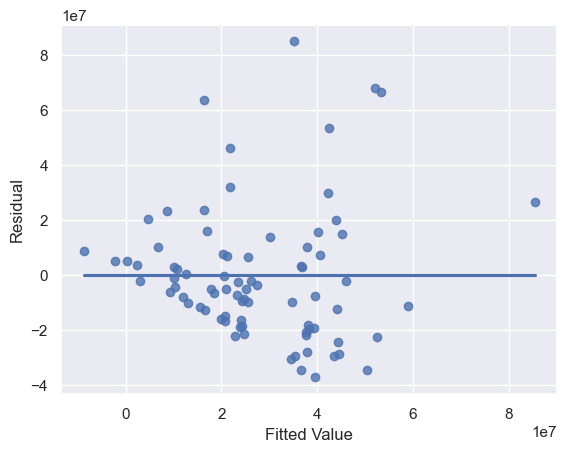

In [31]:
sns.regplot(x = lin.fittedvalues, y = lin.resid, ci= None)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.show()

Checking for Linearity:

It passes!

Check for Constant Variability:

It doesn’t pass.


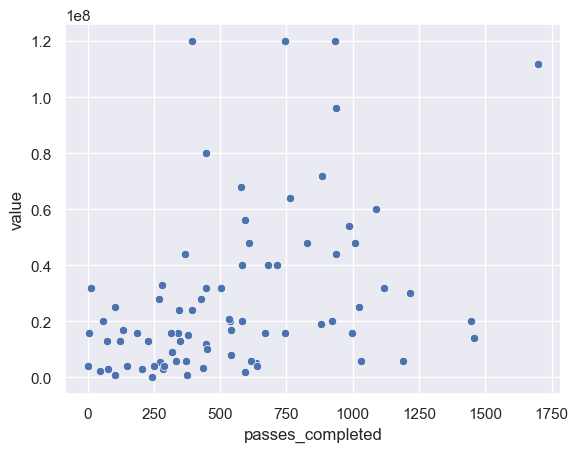

In [32]:
X = df[["passes_completed", "Shots", "passes_blocked",  "height"]] 
y = df["value"]
sns.scatterplot(x="passes_completed", y=y, data=df)
plt.show()

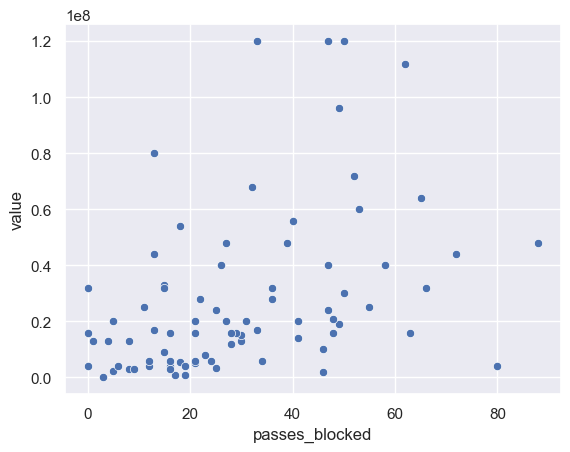

In [33]:
sns.scatterplot(x="passes_blocked", y=y, data=df)
plt.show()

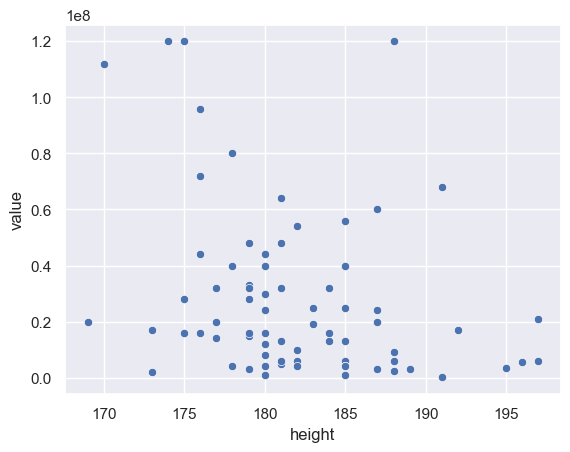

In [34]:
sns.scatterplot(x="height", y=y, data=df)
plt.show()

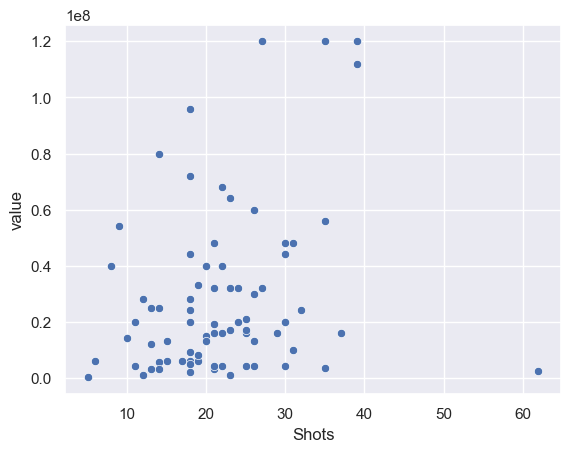

In [35]:
sns.scatterplot(x="Shots", y=y, data=df)
plt.show()

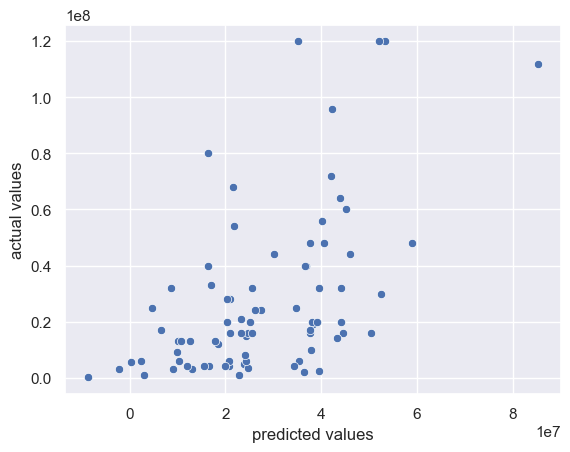

In [36]:
model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = model.predict(sm.add_constant(X))
sns.scatterplot(x=y_pred, y=y)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

Checking for Linearity:

It passes!

Check for Constant Variability:

It doesn’t pass.


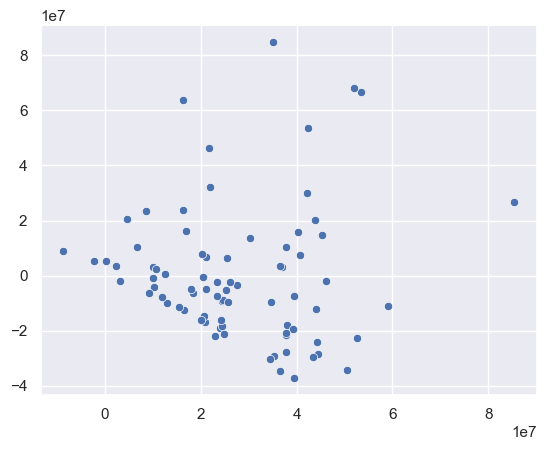

In [37]:
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.show()

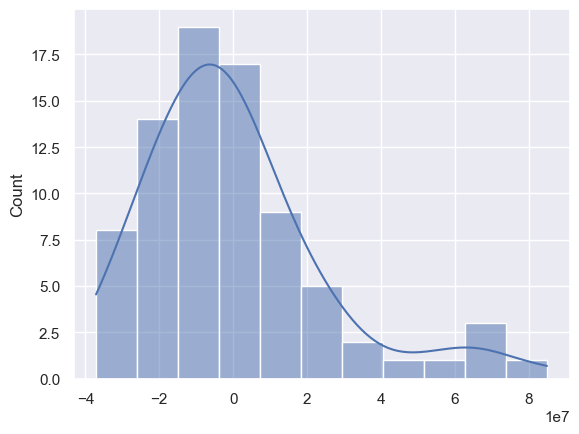

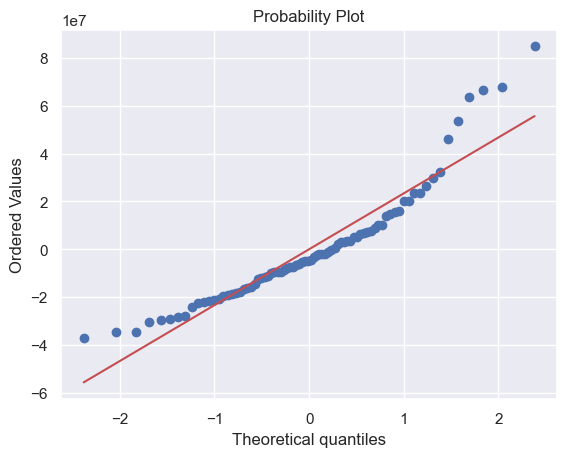

In [38]:
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.show()
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

Not Normal:
Skewed Right

Does not pass the normality test.


In [39]:
corr_matrix = X.corr()
print(corr_matrix)

                  passes_completed     Shots  passes_blocked    height
passes_completed          1.000000 -0.118492        0.632348 -0.287404
Shots                    -0.118492  1.000000        0.012597 -0.020163
passes_blocked            0.632348  0.012597        1.000000 -0.222067
height                   -0.287404 -0.020163       -0.222067  1.000000


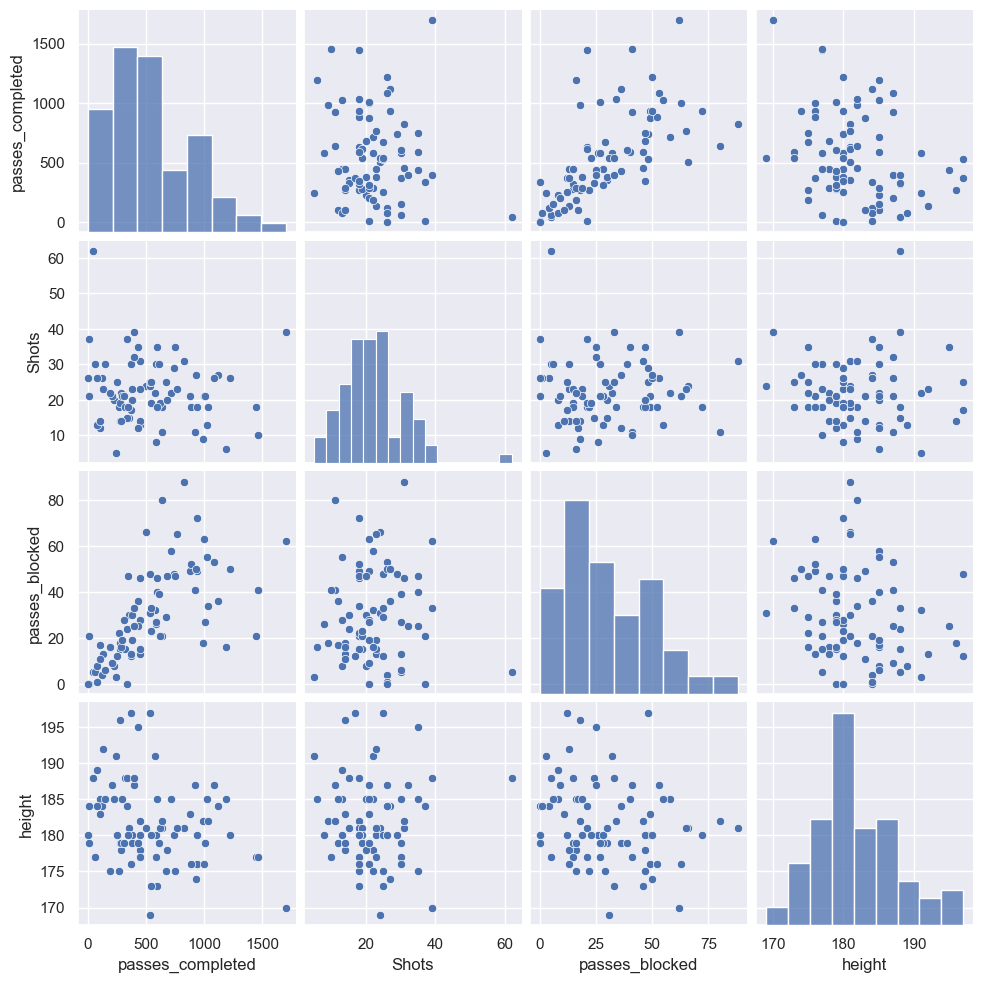

In [40]:
sns.pairplot(df.loc[:,["passes_completed", "Shots", "passes_blocked",  "height"]])
plt.show()

Since the linear regression conditions are not met, now we will be transforming one of the variables (value) with a natural log to see if that helps meet the conditions. 

In [41]:
df['log_value'] = np.log(df['value'])


In [42]:
log = smf.ols('log_value ~ passes_completed + Shots + passes_blocked + height', data = df).fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     8.842
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.65e-06
Time:                        15:11:32   Log-Likelihood:                -117.08
No. Observations:                  80   AIC:                             244.2
Df Residuals:                      75   BIC:                             256.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.0641      4.101      5.624      0.000      14.894      31.234
passes_completed     0.0008      0.000      1.804      0.075   -8.24e-05       0.002
Shots                0.0338      0.014      2.439      0.017       0.006       0.061
passes_blocked       0.0157      0.008      1.983      0.051   -6.95e-05       0.031
height              -0.0450      0.022     -2.039      0.045      -0.089      -0.001
==============================================================================
Omnibus:                       11.403   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.279
Skew:                          -0.762   Prob(JB):                      0.00216
Kurtosis:                       4.167   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The regression equation is 


$\hat{log(value)}$ = 23.0641 + 0.0008[passes_completed] + 0.0338[Shots] + 0.0157[passes_blocked] - 0.0450[height]

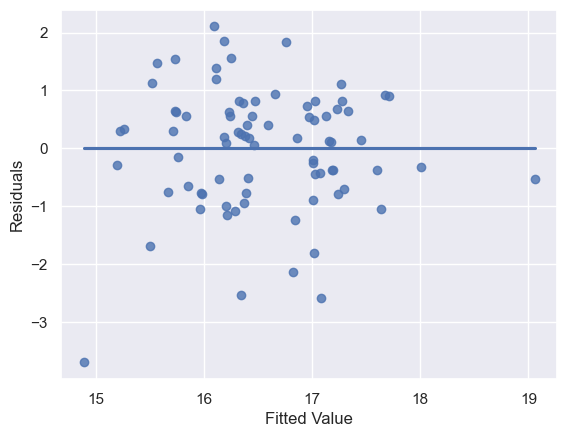

In [43]:
y = df['log_value']
sns.regplot(x = log.fittedvalues, y = log.resid, ci = None)
plt.ylabel('Residuals')
plt.xlabel('Fitted Value')
plt.show()

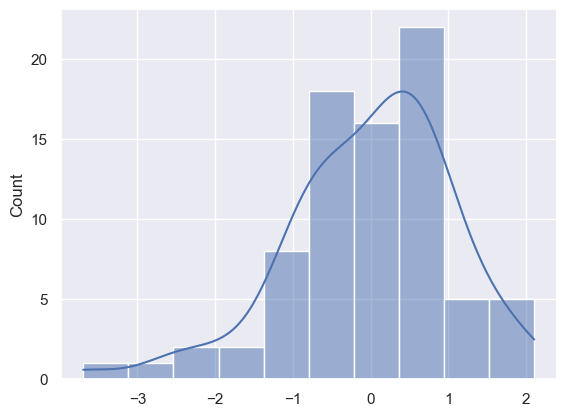

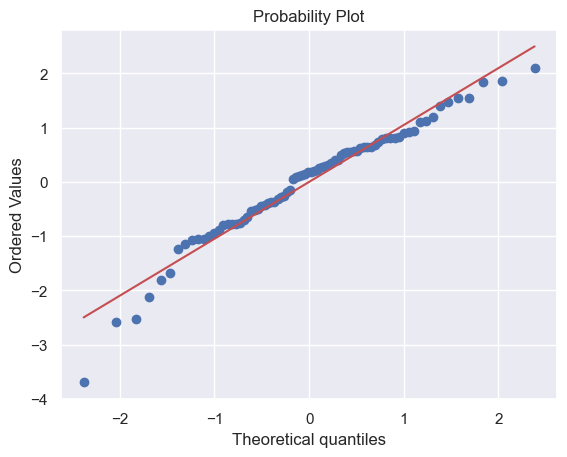

In [44]:
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.show()
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

Not Normal: 
Skewed left

Even though we tried to see if this change would help the conditino be met, it still does not pass the normality test!


Next, we will look at the percent of variability in our response variable.

In [45]:
print('The R^2 for the model is', lin.rsquared)

The R^2 for the model is 0.30222758139586803


This is moderately variable and this may suggest that there is another variable that is important to look at.

In [46]:
X = df[["passes_completed", "Shots", "passes_blocked",  "height"]] 
y = df["value"]
model = sm.OLS(y, X).fit() 
new_observation = [[100, 70, 6, 177]] 
predicted_y = model.predict(new_observation)
predicted_y

array([53926524.29436821])

Here we are predicting the value of player with 100 passes, 70 shots, and 6 passes blocked, with a height of 177cm. With this we expect this person to make about 54 million. This model could then be used by scouts, investors, or fans to predict what value certain players should be/are.

In [47]:
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 

p_values = model.summary2().tables[1]["P>|t|"]
print(p_values)


const               0.177541
passes_completed    0.038774
Shots               0.008005
passes_blocked      0.110953
height              0.131842
Name: P>|t|, dtype: float64


Here we are checking for non-zero slopes by using the p value. By using 0.05 as our alpha we can conclude that shots and passes completed may play a role in the value of a player as their pvalues are lower than the alpha. Therefore there is some sort of linear relationship with those variables.

This linear regression analysis helps answer our research question as it showed which variables have a linear correlation and now scouts/fans know that the best players tend to complete more passes and get shots off. Thus should look for players with these descriptives.


## 5. Logistic Regression




**Logistic Regression Research Question:**
Is there a linear relationship between the log odds of the success level of players being worth more than 20 million euros in value, and goals, assists, touches, minutes, and passes completed? What about the for the population of all professional soccer players? What explanatory variables should we include in the model to build a parsimonious model?


In [48]:

print('Median value:',df['value'].median())
print('Mean value:',df['value'].mean())
df.head()


Median value: 17000000.0
Mean value: 27605906.25


,League,player,Substitution,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,value,nationality,...,goals_per_shot,passes_completed,assisted_shots,passes_blocked,touches,height,assists,games_starts,minutes,log_value
0,MLS,Robert Beric,1,0.46,62,28,2.86,1.29,2400000,si SVN,...,0.14,46,3,5,115,188,0,4,413,14.690979
1,La Liga,Karim Benzema,0,0.63,27,12,3.46,1.54,32000000,fr FRA,...,0.14,1119,61,36,1688,184,8,36,3141,17.281246
2,La Liga,Carlos Soler,1,0.53,8,5,1.27,0.79,40000000,es ESP,...,0.11,582,12,26,932,180,0,24,2066,17.504390
3,La Liga,Cristian Tello,4,0.29,22,8,3.32,1.21,4000000,es ESP,...,0.11,285,7,16,453,178,0,5,787,15.201805
4,La Liga,Mikel Oyarzabal,2,0.88,31,16,4.00,2.07,48000000,es ESP,...,0.11,828,53,88,1571,181,11,36,3051,17.686712


To determine what threshold to use for the success level of players being worth more/less than a certain amount, we looked at the medians and mean of the value of the players in the sample and then chose a reasonable value between these numbers.

In [49]:

df['worth_20_mil'] = 1*(df['value']>20000000)
df_train, df_test = train_test_split(df, test_size = 0.20, random_state= 505)


In [50]:
full_model = smf.logit("worth_20_mil ~ goals+assists+touches+minutes+passes_completed", data = df_train).fit()
print('AIC of full model',full_model.aic)


Optimization terminated successfully.
         Current function value: 0.591912
         Iterations 6
AIC of full model 87.76472759599028


In [51]:
no_goals = smf.logit("worth_20_mil ~ assists+touches+minutes+passes_completed", data = df_train).fit()
print('AIC of model without goals',no_goals.aic)


Optimization terminated successfully.
         Current function value: 0.619079
         Iterations 5
AIC of model without goals 89.24212355732288


In [52]:
no_assists = smf.logit("worth_20_mil ~ goals+touches+minutes+passes_completed", data = df_train).fit()
print('AIC of model without assists',no_assists.aic)


Optimization terminated successfully.
         Current function value: 0.604958
         Iterations 5
AIC of model without assists 87.4346428353127


In [53]:
no_touches = smf.logit("worth_20_mil ~ goals+assists+minutes+passes_completed", data = df_train).fit()
print('AIC of model without touches',no_touches.aic)


Optimization terminated successfully.
         Current function value: 0.592023
         Iterations 5
AIC of model without touches 85.77899621171943


In [54]:
no_minutes = smf.logit("worth_20_mil ~ goals+assists+touches+passes_completed", data = df_train).fit()
print('AIC of model without minutes',no_minutes.aic)


Optimization terminated successfully.
         Current function value: 0.593815
         Iterations 5
AIC of model without minutes 86.0083033999505


In [55]:

no_passes_completed = smf.logit("worth_20_mil ~ goals+assists+touches+minutes", data = df_train).fit()
print('AIC of model without passes completed',no_passes_completed.aic)


Optimization terminated successfully.
         Current function value: 0.591915
         Iterations 6
AIC of model without passes completed 85.76509187359487


Second iteration

In [56]:
current_model1 = smf.logit("worth_20_mil ~ goals+assists+touches+minutes", data = df_train).fit()
print('AIC of the best current model',current_model1.aic)


Optimization terminated successfully.
         Current function value: 0.591915
         Iterations 6
AIC of the best current model 85.76509187359487


In [57]:
no_passes_completed_or_touches = smf.logit('worth_20_mil ~ goals+assists+minutes', data = df_train).fit()
print('AIC of model without passes completed and touches',no_passes_completed_or_touches.aic)


Optimization terminated successfully.
         Current function value: 0.592438
         Iterations 5
AIC of model without passes completed and touches 83.83203070838792


In [58]:

no_passes_completed_or_goals = smf.logit('worth_20_mil ~ touches+assists+minutes', data = df_train).fit()
print('AIC of model without passes completed and goals',no_passes_completed_or_goals.aic)


Optimization terminated successfully.
         Current function value: 0.619084
         Iterations 5
AIC of model without passes completed and goals 87.24270135709695


In [59]:

no_passes_completed_or_assists = smf.logit('worth_20_mil ~ touches+goals+minutes', data = df_train).fit()
print('AIC of model without passes completed and assists',no_passes_completed_or_assists.aic)


Optimization terminated successfully.
         Current function value: 0.605107
         Iterations 5
AIC of model without passes completed and assists 85.4537243235436


In [60]:

no_passes_completed_or_minutes = smf.logit('worth_20_mil ~ touches+assists+goals', data = df_train).fit()
print('AIC of model without passes completed and minutes',no_passes_completed_or_minutes.aic)


Optimization terminated successfully.
         Current function value: 0.594459
         Iterations 5
AIC of model without passes completed and minutes 84.0907989146566


3rd iteration

In [61]:
current_model2 = smf.logit('worth_20_mil ~ goals+assists+minutes', data = df_train).fit()
print('AIC of best current model',current_model2.aic)


Optimization terminated successfully.
         Current function value: 0.592438
         Iterations 5
AIC of best current model 83.83203070838792


In [62]:

no_pc_touches_minutes = smf.logit('worth_20_mil ~ goals+assists', data = df_train).fit()
print('AIC of model without passes completed, touches, and minutes',no_pc_touches_minutes.aic)


Optimization terminated successfully.
         Current function value: 0.595458
         Iterations 5
AIC of model without passes completed, touches, and minutes 82.21861660497052


In [63]:
no_pc_touches_goals = smf.logit('worth_20_mil ~ assists+minutes', data = df_train).fit()
print('AIC of model without passes completed, touches, and goals',no_pc_touches_goals.aic)


Optimization terminated successfully.
         Current function value: 0.621500
         Iterations 5
AIC of model without passes completed, touches, and goals 85.55197691445406


In [64]:

no_pc_touches_assists = smf.logit('worth_20_mil ~ goals+minutes', data = df_train).fit()
print('AIC of model without passes completed, touches, and assists',no_pc_touches_assists.aic)


Optimization terminated successfully.
         Current function value: 0.614792
         Iterations 5
AIC of model without passes completed, touches, and assists 84.69343952747825


4th iteration


In [65]:
current_model3 = smf.logit('worth_20_mil ~ goals+assists', data = df_train).fit()
print('AIC of best current model',current_model3.aic)


Optimization terminated successfully.
         Current function value: 0.595458
         Iterations 5
AIC of best current model 82.21861660497052


In [66]:

goals_model = smf.logit('worth_20_mil ~ goals', data = df_train).fit()
print('AIC of model with just goals',goals_model.aic)


Optimization terminated successfully.
         Current function value: 0.615296
         Iterations 5
AIC of model with just goals 82.75790015149312


In [67]:

assists_model = smf.logit('worth_20_mil ~ assists', data = df_train).fit()
print('AIC of model with just assists',assists_model.aic)


Optimization terminated successfully.
         Current function value: 0.622442
         Iterations 5
AIC of model with just assists 83.67261446115816


After many iterations, the best model we found eliminated all predictor variables but goals and assists.

In [68]:
final_model = smf.logit('worth_20_mil ~ goals+assists', data = df_train).fit()
final_model.summary()


Optimization terminated successfully.
         Current function value: 0.595458
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           worth_20_mil   No. Observations:                   64
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.1184
Time:                        15:11:34   Log-Likelihood:                -38.109
converged:                       True   LL-Null:                       -43.230
Covariance Type:            nonrobust   LLR p-value:                  0.005973
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5759      0.505     -3.119      0.002      -2.566      -0.586
goals          0.0762      0.043      1.753      0.080      -0.009       0.161
assists        0.1226      0.084      1.460      0.144      -0.042       0.287
==============================================================================
"""

Regression Equation:

log($\widehat{odds-player-worth-20-mil}$) = -1.5759 + 0.0762*$\hat{\beta_{goals}}$ + 0.1226*$\hat{\beta_{assists}}$



Unfortunately the slopes for both variables have p-values greater than the standard alpha level of 0.05, so we do not have sufficient evidence to suggest that either of these slopes are non-zero. However if the alpha level were 0.10, also common, we would have sufficient evidence to suggest that the slope of goals is non-zero, as the p-value is 0.08, less than 0.10.

In [69]:
phat_test = final_model.predict(exog=df_test[["goals","assists"]])
df_test.loc[:,"phat_test"] = phat_test

fpr, tpr, score = roc_curve(y_true = df_test["worth_20_mil"], y_score = df_test["phat_test"])
auc = roc_auc_score(y_true=df_test["worth_20_mil"], y_score = df_test["phat_test"])


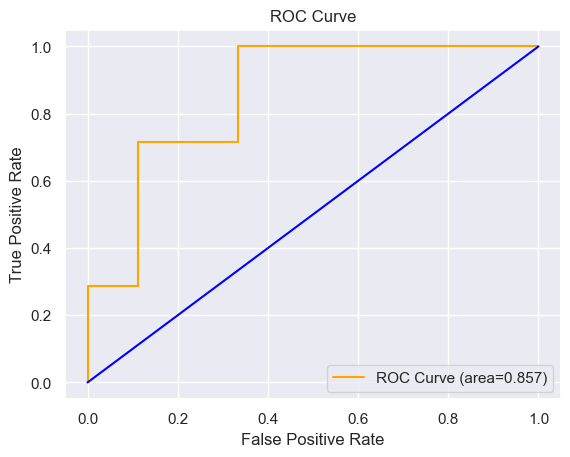

In [70]:
plt.plot(fpr,tpr, color = "orange", label = "ROC Curve (area=" + str(round(auc,3)) + ")")
plt.plot([0,1], [0,1], color = "blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [71]:
ppf_idx = np.argmax(tpr - fpr)
ppf_threshold = score[ppf_idx]
print('Predictive probability threshold:',ppf_threshold)


Predictive probability threshold: 0.28497080435406025


We're just trying to correctly predict if a player is worth more than 20 million euros, so true positive rate is more important than false positive rate in this case. Therefore we max out true positive rate while trying to keep false positive rate to a minimum.

In [72]:
df_test.loc[df_test['phat_test'] >= 0.28497080435406025, 'phat'] = 1
df_test.loc[df_test['phat_test'] < 0.28497080435406025, 'phat'] = 0
df_test.head()


,League,player,Substitution,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,value,nationality,...,passes_blocked,touches,height,assists,games_starts,minutes,log_value,worth_20_mil,phat_test,phat
15,Serie A,Andrea Belotti,0,0.44,24,11,3.02,1.39,32000000,it ITA,...,66,1234,181,3,34,3008,17.281246,1,0.502751,1.0
3,La Liga,Cristian Tello,4,0.29,22,8,3.32,1.21,4000000,es ESP,...,16,453,178,0,5,787,15.201805,0,0.194114,0.0
23,Serie A,Cristiano Ronaldo,1,1.27,26,13,6.22,3.11,60000000,pt POR,...,53,1761,187,5,33,2917,17.909855,1,0.802032,1.0
60,Ligue 1,Amine Gouiri,2,0.35,26,10,2.74,1.05,4000000,fr FRA,...,0,0,180,0,0,1,15.201805,0,0.171382,0.0
37,Bundesliga,Andre Silva,0,0.88,37,16,4.38,1.90,16000000,pt POR,...,21,702,184,3,16,1575,16.588099,0,0.427090,1.0


In [73]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true = df_test['worth_20_mil'], y_pred = df_test['phat']).ravel()
(tn,fp,fn,tp)


(6, 3, 0, 7)

In [74]:

tpr = tp / (fn +tp)
fpr = fp / (fp + tn)
print('True positive rate:', tpr)
print('False positive rate:',fpr)


True positive rate: 1.0
False positive rate: 0.3333333333333333


Through our analysis, we found that out of these explanatory variables, only goals and assists were best to include in our final, parsimonious model, as this combination had the lowest AIC of all the models we fitted. While there is some positive linear relationship between these variables and the log odds of the success level of players being worth more than 20 million euros, the correlation is not strong given a Psuedo R-squared value of just 0.1184 in the final model. We also cannot extrapolate this linear relationship to the whole population of all professional soccer players, as while the p-values of the slopes related to these variables was somewhat low (0.080 for goals and 0.144 for assists), they were not as low as the standard alpha value of 0.05, so we don't have sufficient evidence to suggest this trend applies to the population as well.

## 6. Conclusion

While unfortunately most of the models we created throughout our research failed to pass all given checks, so we don’t have very conclusive answers to our research questions, we still came up with useful findings to help guide our answers to these questions. 

In the descriptive analytics section, we attempted to see if there was a relationship between a player’s position and their value. Through our research, there was evidence to suggest at least in this sample, positions all had relatively similar means, but the high ends for forwards/midfielders and strictly midfielders were greater than other positions.

Next, in the inference section we attempted to see if there was a difference between the value of French/Spanish soccer players and all other players. While both sets had relatively similar means, through the histograms created, we can see that French/Spanish players had a lot more players worth the middling range of values, while all other players were generally in the low end, but buoyed by a few high value players. 

As for linear regression, we attempted to see if there was a linear relationship between the number of shots, height, passes blocked, and passes completed with the value of a player. While the models we made didn’t pass all checks, there were still a couple of statistically significant variables in passes completed and shots, both of which had a positive relationship with value. 

Finally, through logistic regression we attempted to see if there was a linear relationship between the log odds of the success level of players being worth more than 20 million euros in value, and goals, assists, touches, minutes, and passes completed. While this model also didn’t produce any statistically significant variables, we found that goals and assists were the best predictor variables, and had a slightly positive relationship with the log odds of the success level.


If there were to be future work done in the context of this analysis, an interesting thing to look at could be per minute stats. By normalizing statistics like goals, assists, shots, passes completed, and touches by a per minute basis, we could potentially see the more productive and therefore better/more valuable players rise to the top of these metrics, rather than just players who happened to constantly be in the game, naturally accruing these statistics. I would imagine the value of players would be more correlative to the top players in the per minute stats (adjusting for position could also see much better results), and therefore analyses done related to the value could be far more effective.